<a href="https://colab.research.google.com/github/Varshiniamirishetty/IPA-Project/blob/main/photo_sketch_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

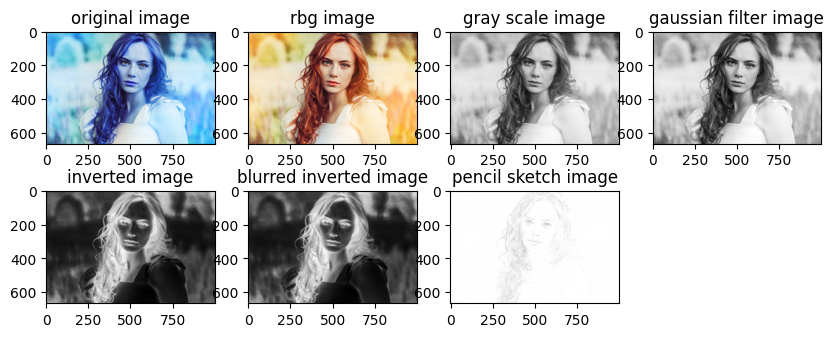

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
img=r"pic.jpg"
i_bgr=cv2.imread(img)
plt.figure(figsize=(10,10))
plt.subplot(5,4,1)
plt.title("original image")
plt.imshow(i_bgr)


i_rgb=i_bgr[:,:,::-1]/255.0
r=i_rgb[:,:,0]
g=i_rgb[:,:,1]
b=i_rgb[:,:,2]
plt.subplot(5,4,2)
plt.title("rbg image")
plt.imshow(i_rgb)


grayscale=(r+g+b)/3
plt.subplot(5,4,3)
plt.title("gray scale image")
plt.imshow(grayscale, cmap='gray') # Added cmap='gray' for better visualization


def gaussian(size,sigma=1):
  k=size//2
  kernel=np.zeros((size,size),np.float64)
  for x in range(-k,k+1):
    for y in range(-k,k+1):
      kernel[x+k,y+k]=np.exp(-(x**2+y**2)/(2*sigma**2)) # Corrected formula for Gaussian
  kernel/=np.sum(kernel)
  return kernel

def gaussian_filter(img, kernel_size, sigma=1):
  kernel = gaussian(kernel_size, sigma)
  pad = kernel_size // 2
  img_pad = np.pad(img, pad, mode='edge')
  output = np.zeros_like(img)

  for i in range(output.shape[0]):
    for j in range(output.shape[1]):
      region = img_pad[i:i+kernel_size, j:j+kernel_size]
      output[i, j] = np.sum(kernel * region)
  return output

m,n=grayscale.shape
m1,n1=3,3
# Pass kernel size (m1 or n1) to gaussian_filter
g=gaussian_filter(grayscale, m1, 1) # Using m1 as kernel size
plt.subplot(5,4,4)
plt.title("gaussian filter image")
plt.imshow(g, cmap='gray') # Added cmap='gray' for better visualization

inverted = 1 - g
plt.subplot(5,4,5)
plt.title("inverted image")
plt.imshow(inverted, cmap='gray')

blur_inverted = gaussian_filter(inverted, m1, 1)
plt.subplot(5,4,6)
plt.title("blurred inverted image")
plt.imshow(blur_inverted, cmap='gray')

pencil_sketch = grayscale / (1 - blur_inverted)
pencil_sketch = np.clip(pencil_sketch, 0, 1)
plt.subplot(5,4,7)
plt.title("pencil sketch image")
plt.imshow(pencil_sketch, cmap='gray')

